<a href="https://colab.research.google.com/github/DZIEDZOAVE-WISDOM/Admin-Dashboard/blob/main/Ayadata_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
amazon_df = pd.read_csv('/content/amazonnn_pd.csv')
#display(amazon_df.head())

In [ ]:
# checking the data type of each column
display(amazon_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   Product Category     1465 non-null   object 
 4   discounted_price     1465 non-null   int64  
 5   actual_price         1465 non-null   int64  
 6   discount_percentage  1465 non-null   float64
 7   rating               1465 non-null   float64
 8   rating_count         1465 non-null   float64
 9   about_product        1465 non-null   object 
 10  user_id              1465 non-null   object 
 11  user_name            1465 non-null   object 
 12  review_id            1465 non-null   object 
 13  review_title         1465 non-null   object 
 14  review_content       1465 non-null   object 
 15  img_link             1465 non-null   o

None

In [5]:
# Based on the info() output, the following columns need to be converted to numeric types:
# 'discounted_price', 'actual_price', 'rating', 'rating_count'

# Function to clean and convert currency columns
def clean_currency(price_str):
    if isinstance(price_str, str):
        # Remove currency symbols (like ₹) and commas
        price_str = price_str.replace('₹', '').replace(',', '')
    # Convert to numeric, coercing errors to NaN
    return pd.to_numeric(price_str, errors='coerce')

# Apply the cleaning function to price columns
amazon_df['discounted_price'] = amazon_df['discounted_price'].apply(clean_currency)
amazon_df['actual_price'] = amazon_df['actual_price'].apply(clean_currency)

# Convert 'rating' to numeric, coercing errors to NaN
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

# Convert 'rating_count' to numeric, removing commas and coercing errors to NaN
amazon_df['rating_count'] = amazon_df['rating_count'].astype(str).str.replace(',', '', regex=False)
amazon_df['rating_count'] = pd.to_numeric(amazon_df['rating_count'], errors='coerce').fillna(0) # Fill NaN rating counts with 0

# Display the data types after conversion
display(amazon_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   Product Category     1465 non-null   object 
 4   discounted_price     1465 non-null   int64  
 5   actual_price         1465 non-null   int64  
 6   discount_percentage  1465 non-null   float64
 7   rating               1465 non-null   float64
 8   rating_count         1465 non-null   float64
 9   about_product        1465 non-null   object 
 10  user_id              1465 non-null   object 
 11  user_name            1465 non-null   object 
 12  review_id            1465 non-null   object 
 13  review_title         1465 non-null   object 
 14  review_content       1465 non-null   object 
 15  img_link             1465 non-null   o

None

In [ ]:
# Count the total number of rows in the DataFrame
total_rows = len(amazon_df)

# Display the total number of rows
print(f"The total number of rows in the dataset is: {total_rows}")

The total number of rows in the dataset is: 1465


In [ ]:
# Count the number of empty cells (missing values) in each column
empty_cells_count = amazon_df.isnull().sum()

# Display the count of empty cells per column
print("Number of empty cells in each column:")
display(empty_cells_count)

Number of empty cells in each column:


,0
product_id,0
product_name,0
category,0
Product Category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0


#**Q1.**

In [ ]:
# Group by 'Product Category' and calculate the average discount percentage and average rating
# We will use the 'Product Category' column as requested.
category_analysis_product = amazon_df.groupby('Product Category').agg(
    average_discount_percentage=('discount_percentage', 'mean'),
    average_rating=('rating', 'mean')
).reset_index()

# Handle potential NaN values in average_discount_percentage and average_rating before finding max/min
# Drop rows where average_discount_percentage or average_rating is NaN for this specific calculation
category_analysis_product_cleaned = category_analysis_product.dropna(subset=['average_discount_percentage', 'average_rating'])

# Find the category with the highest average discount percentage from the cleaned data
# Check if category_analysis_product_cleaned is empty before proceeding
if not category_analysis_product_cleaned.empty:
    highest_discount_category = category_analysis_product_cleaned.loc[category_analysis_product_cleaned['average_discount_percentage'].idxmax()]

    # Find the category with the lowest average rating from the cleaned data
    lowest_rating_category = category_analysis_product_cleaned.loc[category_analysis_product_cleaned['average_rating'].idxmin()]

    # To find the category that best fits both criteria (highest discount AND lowest rating),
    # we can sort by average discount descending and then by average rating ascending.
    sorted_categories = category_analysis_product_cleaned.sort_values(by=['average_discount_percentage', 'average_rating'], ascending=[False, True])

    # The top category in this sorted list is the one with the highest average discount and, among those with high discount, the lowest average rating.
    display("Product Category analysis sorted by average discount (desc) and average rating (asc):")
    display(sorted_categories.head())

    # The product category with the highest average discount percentage and the lowest average rating among those with high discount is the first one in the sorted list.
    product_category_of_interest = sorted_categories.iloc[0]

    display("\nProduct Category with the highest average discount percentage and lowest average rating among those with high discount:")
    display(product_category_of_interest)
else:
    print("No product categories with valid average discount percentage and average rating found for analysis after handling missing values.")

'Product Category analysis sorted by average discount (desc) and average rating (asc):'

,Product Category,average_discount_percentage,average_rating
5,HomeImprovement,0.575000,4.250000
1,Computers&Accessories,0.540243,4.154967
3,Health&PersonalCare,0.530000,4.000000
2,Electronics,0.508289,4.081749
6,MusicalInstruments,0.460000,3.900000


'\nProduct Category with the highest average discount percentage and lowest average rating among those with high discount:'

,5
Product Category,HomeImprovement
average_discount_percentage,0.575
average_rating,4.25


In [ ]:
# Calculate and display the mean of the 'rating_count' column
mean_value = amazon_df['rating_count'].mean()
print(f"The mean of the rating_count column is: {mean_value}")

The mean of the rating_count column is: 18270.564505119455


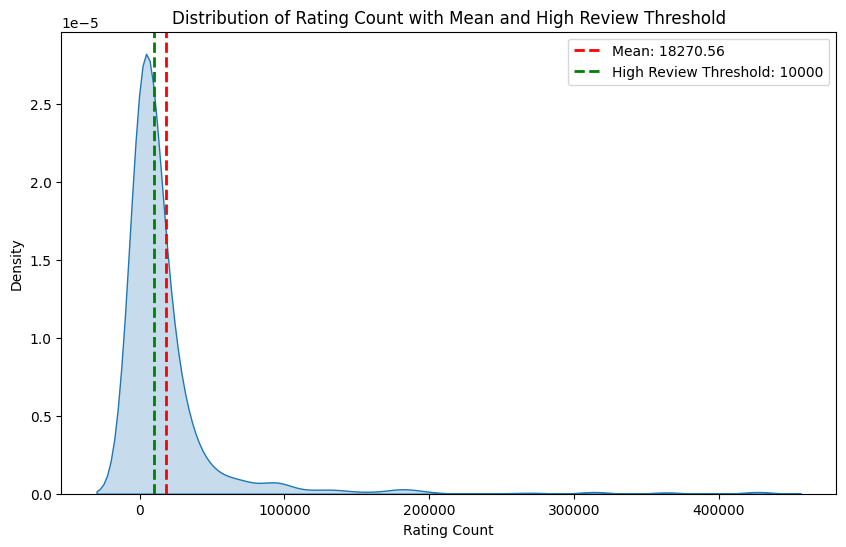

In [ ]:
# Checking the distribution of the rating_count column before I define the
# Threshold for high review.

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'rating_count' using kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=amazon_df, x='rating_count', fill=True)

# Add a vertical line for the mean
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add a vertical line for the high_review_threshold
plt.axvline(high_review_threshold, color='green', linestyle='dashed', linewidth=2, label=f'High Review Threshold: {high_review_threshold}')


plt.title('Distribution of Rating Count with Mean and High Review Threshold')
plt.xlabel('Rating Count')
plt.ylabel('Density')
plt.legend()
plt.show()

# Based on the mean (around 18270) and the skewed distribution, a threshold of 10000 seems reasonable
# to identify products with significantly higher than average review counts.
#  because the data is positively skewed, the majority of products have a review count below the mean.
# Therefore, choosing a threshold like 10000, which is below the mean but still in the upper region of
# the distribution as seen in the kde plot, allows us to identify products with a significantly high
# number of reviews compared to the bulk of the data, without being overly influenced by the extreme outliers in the long tail



In [ ]:
high_review_threshold = 10000

# Filter products with a high review count
high_review_products = amazon_df[amazon_df['rating_count'] >= high_review_threshold].copy()

# Sort by rating in descending order and select the top 5
top_5_products = high_review_products.sort_values(by='rating', ascending=False).head(5)

# Display the top 5 products
display(top_5_products[['product_name', 'rating', 'rating_count']])

,product_name,rating,rating_count
1145,Swiffer Instant Electric Water Heater Faucet T...,4.8,53803.0
447,Spigen EZ Fit Tempered Glass Screen Protector ...,4.6,26603.0
886,"Logitech M331 Silent Plus Wireless Mouse, 2.4G...",4.6,12375.0
820,Redgear MP35 Speed-Type Gaming Mousepad (Black...,4.6,33434.0
964,Logitech G402 Hyperion Fury USB Wired Gaming M...,4.6,10760.0


In [ ]:
# Calculate the price difference
amazon_df['price_difference'] = amazon_df['actual_price'] - amazon_df['discounted_price']

# Sort by price difference in descending order to find products with the highest difference
highest_price_difference_products = amazon_df.sort_values(by='price_difference', ascending=False)

display("Products with the highest price difference:")
display(highest_price_difference_products[['product_name', 'category', 'actual_price', 'discounted_price', 'price_difference']].head())

'Products with the highest price difference:'

,product_name,category,actual_price,discounted_price,price_difference
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",139900,77990,61910
1182,"Coway Professional Air Purifier for Home, Long...","Home&Kitchen|Heating,Cooling&AirQuality|AirPur...",59900,14400,45500
568,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics|Mobiles&Accessories|Smartphones&Ba...,74999,37990,37009
150,VU 138 cm (55 inches) Premium Series 4K Ultra ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",65000,29990,35010
1354,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,"Home&Kitchen|Heating,Cooling&AirQuality|AirCon...",75990,42990,33000


In [ ]:
# Calculate the price difference
amazon_df['price_difference'] = amazon_df['actual_price'] - amazon_df['discounted_price']

# Sort by price difference in descending order to find products with the highest difference
highest_price_difference_products = amazon_df.sort_values(by='price_difference', ascending=False)

display("Products with the highest price difference:")
display(highest_price_difference_products[['product_name', 'category', 'actual_price', 'discounted_price', 'price_difference']].head())

'Products with the highest price difference:'

,product_name,category,actual_price,discounted_price,price_difference
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",139900,77990,61910
1182,"Coway Professional Air Purifier for Home, Long...","Home&Kitchen|Heating,Cooling&AirQuality|AirPur...",59900,14400,45500
568,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics|Mobiles&Accessories|Smartphones&Ba...,74999,37990,37009
150,VU 138 cm (55 inches) Premium Series 4K Ultra ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",65000,29990,35010
1354,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,"Home&Kitchen|Heating,Cooling&AirQuality|AirCon...",75990,42990,33000


In [ ]:
# Calculate the price difference
# Ensure this is done first to have 'price_difference' column
amazon_df['price_difference'] = amazon_df['actual_price'] - amazon_df['discounted_price']

# Calculate potential revenue opportunity
# Potential Revenue Opportunity = actual_price * rating_count (as a proxy for sales volume)
amazon_df['potential_revenue_opportunity'] = amazon_df['actual_price'] * amazon_df['rating_count']

# Sort by price difference in descending order to find products with the highest difference
# Now that 'potential_revenue_opportunity' is in amazon_df, we can sort it.
highest_price_difference_products = amazon_df.sort_values(by='price_difference', ascending=False)

display("\nProducts with highest price difference, sorted by potential revenue opportunity:")
display(highest_revenue_opportunity_among_high_discount.sort_values(by='potential_revenue_opportunity', ascending=False)[['product_name', 'Product Category', 'actual_price', 'price_difference', 'rating_count', 'potential_revenue_opportunity']].head())

'\nProducts with highest price difference, sorted by potential revenue opportunity:'

,product_name,Product Category,actual_price,price_difference,rating_count,potential_revenue_opportunity
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Electronics,10999,2500,313836.0,3.451882e+09
566,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",Electronics,9499,2000,313832.0,2.981090e+09
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",Electronics,8499,2000,313836.0,2.667292e+09
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",Electronics,7999,1500,313832.0,2.510342e+09
568,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,74999,37009,27790.0,2.084222e+09


In [ ]:
# To find the category with the largest revenue opportunity among these, we can group the
# 'highest_revenue_opportunity_among_high_discount' DataFrame by 'Product Category' and sum the potential revenue opportunity.
category_revenue_opportunity = highest_revenue_opportunity_among_high_discount.groupby('Product Category')['potential_revenue_opportunity'].sum().reset_index()

# Sort the categories by total potential revenue opportunity in descending order
largest_revenue_category = category_revenue_opportunity.sort_values(by='potential_revenue_opportunity', ascending=False)

display("Product Categories with largest potential revenue opportunity (among products with highest price difference):")
display(largest_revenue_category.head())

'Product Categories with largest potential revenue opportunity (among products with highest price difference):'

,Product Category,potential_revenue_opportunity
2,Electronics,9.802081e+10
1,Computers&Accessories,1.261483e+10
4,Home&Kitchen,1.045972e+10
6,MusicalInstruments,1.511171e+08
7,OfficeProducts,6.077882e+07


In [ ]:
# Based on these results, identify the product and category with the largest revenue opportunity.
# The product with the largest revenue opportunity is the first one in 'highest_revenue_opportunity_among_high_discount'.
product_with_largest_revenue = highest_revenue_opportunity_among_high_discount.iloc[0]

# The category with the largest revenue opportunity is the first one in 'largest_revenue_category'.
category_with_largest_revenue = largest_revenue_category.iloc[0]

display("Product with the largest revenue opportunity (among those with highest price difference):")
display(product_with_largest_revenue[['product_name', 'Product Category', 'actual_price', 'price_difference', 'rating_count', 'potential_revenue_opportunity']])

display("Product Category with the largest revenue opportunity (among those with highest price difference):")
display(category_with_largest_revenue)

'Product with the largest revenue opportunity (among those with highest price difference):'

,370
product_name,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."
Product Category,Electronics
actual_price,10999
price_difference,2500
rating_count,313836.0
potential_revenue_opportunity,3451882164.0


'Product Category with the largest revenue opportunity (among those with highest price difference):'

,2
Product Category,Electronics
potential_revenue_opportunity,98020806794.0


In [ ]:
#amazon_df.head()

In [ ]:
# Check the data type of the 'discount_percentage' column
display(amazon_df['discount_percentage'].dtype)

# Display unique values and their counts in the 'discount_percentage' column
display(amazon_df['discount_percentage'].value_counts(dropna=False))

dtype('float64')

,count
discount_percentage,
0.50,56
0.60,56
0.00,49
0.80,37
0.55,36
...,...
0.07,2
0.02,2
0.89,1


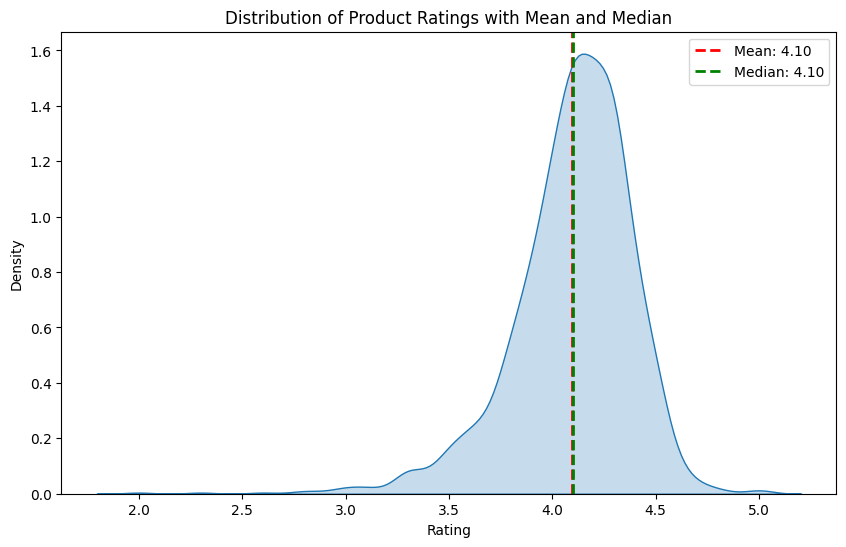

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe (if not already loaded)
try:
    amazon_df.head()
except NameError:
    amazon_df = pd.read_csv('/content/amazonnn_pd.csv')

# Calculate the mean and median of the 'rating' column
mean_rating = amazon_df['rating'].mean()
median_rating = amazon_df['rating'].median()

# Plot the distribution of 'rating' using kdeplot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=amazon_df, x='rating', fill=True)

# Add vertical lines for the mean and median
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_rating:.2f}')


plt.title('Distribution of Product Ratings with Mean and Median')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()